In [ ]:
# !pip install matplotlib

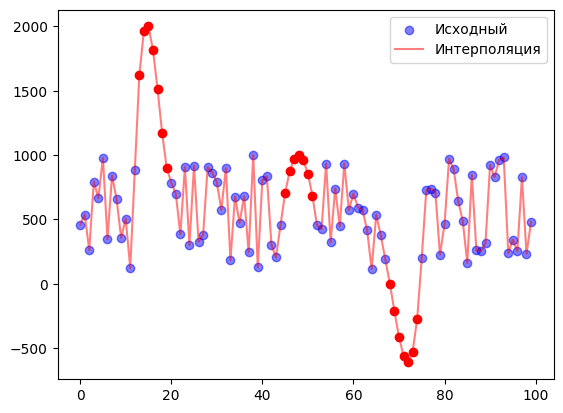

In [24]:
import tms
import matplotlib.pyplot as plt

# считывание временного ряда по API
ts = tms.TimeSeries("http://www.randomnumberapi.com/api/v1.0/random?min=100&max=1000&count=100")

# выкалываем некоторые узлы для дальнейшей интерполяции
missing = [[45, 52], [13, 20], [68, 75]]

for arr in missing:
    ts[arr[0]:arr[1]] = [None] * (arr[1] - arr[0])
 
# строим график исходного временного ряда    
plt.scatter(range(len(ts)), ts, label='Исходный', alpha=0.5, color='blue');

# выполняем интерполяцию сплайнами
interpolated = tms.interpolation.interpolate(ts, 'spline', 10, 10)
plt.plot(interpolated, label='Интерполяция', color='red', alpha=0.5);

# строим график интерполированных участков
for arr in missing:
    plt.scatter(range(arr[0], arr[1]), interpolated[arr[0]:arr[1]], color='red');
   
# выводим легенду графика    
plt.legend();

In [37]:
# рассчитываем описательные статистики интерполированного ряда
print(f"\n Колмогоровское среднее 3 порядка: {tms.stats.kolmogorov_mean(interpolated, 3)}\n")
print(f"\n Среднее значение: {tms.stats.mean(interpolated)}\n")
print(f"\n Автокорреляция с лагом 2: {tms.stats.autocorrelation(interpolated, 2)}\n")
print(f"\n 50% перцентиль: {tms.stats.percentile(interpolated, 50)}\n")
print(f"\n Медиана: {tms.stats.median(interpolated)}\n")


 Колмогоровское среднее 3 порядка: 569.9560442995079


 Среднее значение: 588.5715385336848


 Автокорреляция с лагом 2: 0.5874306887703938


 Автокорреляция с лагом 2: 582.5


 Автокорреляция с лагом 2: 582.5

